<a href="https://colab.research.google.com/github/vk4nubip/nubip-DS-ML/blob/main/Classification_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
#### Load libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## --------- Classifiers --------------
from sklearn import svm # import Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier # import k-Nearest Neigbours Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree # import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # import Random Forest Classifier
from sklearn.linear_model import LogisticRegression # import Logistic Regression for Classification 
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier # import Light Gradient Boosting Machine Classifier

## --------- Functions for Fitting, Evaluation and Explanation
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn.model_selection import cross_val_score # import cross-validation function
from sklearn import metrics # import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder  # convert to numeric and One-Hot Encoding
from sklearn.tree import export_text # build a text report showing the rules of a decision tree

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

## --------- Datasets ----------------
from sklearn.datasets import load_diabetes  # load dataset "Diabetes"
from sklearn.datasets import fetch_openml   # get datasets from openml.org

## --------- Vizualisation -----------
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Datasets**

## RiceType.csv

In [2]:
url = "https://raw.githubusercontent.com/vk4nubip/nubip-DS-ML/refs/heads/main/Data/Rice%20Type.csv"
rice_df = pd.read_csv(url); 
rice_df = rice_df.drop(columns=['id']); rice_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


All attributes are numeric variables without missing values. The variables considered are 12 and were extracted from high-definition images of seeds:
* _Id_: identification code of each instance. This variable was not taken into account for the analyzes.
* _Area_: number of pixels in the region generated by the grain.
Eccentricity: this measure presupposes the consideration of the grain of rice as an ellipse. In particular, it considers the relationship between the foci of the ellipse having the same second moments of the region generated by the grain and the length of its major axis.
* _MajorAxisLength_: length of the major axis of the ellipse which has the same second moments as the grain region.
* _MinorAxisLength_: length of the minor axis of the ellipse which has the same second moments as the grain region.
* _ConvexArea_: consists of the number of pixels that belong to the convex image, that is a binary image that contains all the pixels within the convex envelope. It is generated by the intersection of all subsets that contain a certain vector space.
* _EquivDiameter_: is the diameter of a circle that has the same area as that of the region of the grain of rice.
* _Extent_: returns the ratio between the number of pixels relating to the grain region and those of the bounding box5, i.e. the box with the smallest size in which the element can be contained.
* _Perimeter_: count of the number of pixels present on the outline of the grain of rice.
* _Roundness_: it is relative to the roundness of the grain of rice.
* _AspectRation_: is the ratio between the major axis and the minor axis of the ellipse that represents the grain.
* Class: is the target variable. It is binary, where the distribution is equal between the two classes, so the dataset is not unbalanced:
  * 0 represents _Gonen_ rice (45.1%) - comes from Turkey and is the third rice in the world in terms of productivity and, like all other Turkish rice seed varieties, is characterized by high germination rates,
  * 1 represents _Jasmine_ (54.9%) - originates in Thailand and is characterized by a very high level of appearance, quality and aroma.

**_The primary goal_**, in this case, is to determine with the greatest possible success the type of rice grain based on the variables identified in the dataset, thus identifying the best classification model.

**_The secondary goal_**, on the other hand, is to establish which of the two varieties of rice is more easily identifiable.

## Churn_Modeling.csv

In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Churn_Modelling.csv"
churn_df = pd.read_csv(url)
churn_df.drop("RowNumber", axis=1, inplace=True)  # drop the column

## OR
#### Loading Data from Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#churn_df = pd.read_csv("/content/drive/My Drive/Churn_Modelling.csv")

# Rename column
churn_df.rename(columns={'NumOfProducts': 'NumOfProds'}, inplace = True)
churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**This case involves customer churn modeling for a bank**. The goal is to predict which customers are likely to leave the bank's services (churn) based on various customer attributes.

**The dataset** contains information for many customers, including their demographics (like age, gender, location), financial details (credit score, balance, salary), and relationship history with the bank (tenure, products used, activity status). The key variable is 'Exited', which indicates whether a specific customer has already churned (1) or not (0).

By analyzing these features, the bank aims to build a predictive model to identify at-risk customers early, allowing them to implement retention strategies.

***Variables***:

* CustomerId: A unique identifier assigned to each customer.
* Surname: The last name of the customer.
* CreditScore: A measure of the customer's creditworthiness, ranging from 0 to 1000. A higher score indicates better credit.
* Geography: The country where the customer resides (e.g., France, Spain, Germany).
* Gender: The gender of the customer (e.g., Male, Female).
* Age: The age of the customer in years.
* Tenure: The number of years the customer has been with the bank.
* Balance: The amount of money held in the customer's bank account.
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card).
* HasCrCard: A binary indicator (0 or 1) showing if the customer has a credit card with the bank.
* IsActiveMember: A binary indicator (0 or 1) showing if the customer is an active member.
* EstimatedSalary: The estimated annual salary of the customer.
* Exited: The target variable, a binary indicator (0 or 1) showing if the customer has churned (1) or not (0).

## Diabetes.csv

In [4]:
#### Loading Data
diabetes_df = fetch_openml(data_id=43582, as_frame=True)['frame']
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [5]:
## Rename columns
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

diabetes_df.columns = col_names
diabetes_df.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0


**Problem Statement** NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**The dataset** consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more:

* Pregnancies - Pregnancies Number of times
* Glucose - Glucose Plasma concentration in an oral glucose tolerance test
* BloodPressure - Blood Pressure Diastolic blood (mm Hg)
* SkinThickness - Skin Thickness Triceps (mm)
* Insulin - Insulin Two hour serum
* BMI - Body Mass Index Diabetes
* DiabetesPedigreeFunction - Pedigree Function Diabetes
* Age - Age in years

Finally,

* Outcome - Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0 Inspiration

## Dry_Bean.csv

In [6]:
url = "https://archive.ics.uci.edu/static/public/602/data.csv"
bean_df = pd.read_csv(url)

OR take data from UCI repository

In [7]:
#pip install ucimlrepo

#from ucimlrepo import fetch_ucirepo

#### fetch dataset
#dry_bean = fetch_ucirepo(id=602)

#### data (as pandas dataframes)
#X = dry_bean.data.features
#y = dry_bean.data.targets

#### metadata
#print(dry_bean.metadata)
#variable information
#print(dry_bean.variables)

**Abstract**:\
Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

* Number of Instances (records in your data set): 13611
* Number of Attributes (fields within each record): 17


__Relevant Information:__
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

__Attribute Information__:
1. *Area* (A): The area of a bean zone and the number of pixels within its boundaries.
2. *Perimeter* (P): Bean circumference is defined as the length of its border.
3. *Major axis length* (L): The distance between the ends of the longest line that can be drawn from a bean.
4. *Minor axis length* (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. *Aspect ratio* (K): Defines the relationship between L and l.
6. *Eccentricity* (Ec): Eccentricity of the ellipse having the same moments as the region.
7. *Convex area* (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. *Equivalent diameter* (Ed): The diameter of a circle having the same area as a bean seed area.
9. *Extent* (Ex): The ratio of the pixels in the bounding box to the bean area.
10. *Solidity* (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. *Roundness* (R): Calculated with the following formula: (4piA)/(P^2)
12. *Compactness* (CO): Measures the roundness of an object: Ed/L
13. *ShapeFactor1* (SF1)
14. *ShapeFactor2* (SF2)
15. *ShapeFactor3* (SF3)
16. *ShapeFactor4* (SF4)
17. __*Class*__ (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

***Source***:\
Murat KOKLU, Ilker Ali OZKAN \
Faculty of Technology,\
Selcuk University, TURKEY. \
ORCID : 0000-0002-2737-2360, 0000-0002-5715-1040 \
mkoklu@selcuk.edu.tr, ilkerozkan@selcuk.edu.tr

__Links:__ 
1. https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
2. https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset?resource=download&select=Dry_Bean.csv

## Cell_samples.csv

In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
cell_df = pd.read_csv(url); cell_df[10:50].head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
10,1035283,1,1,1,1,1,1,3,1,1,2
11,1036172,2,1,1,1,2,1,2,1,1,2
12,1041801,5,3,3,3,2,3,4,4,1,4
13,1043999,1,1,1,1,2,3,3,1,1,2
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
16,1048672,4,1,1,1,2,1,2,1,1,2
17,1049815,4,1,1,1,2,1,3,1,1,2
18,1050670,10,7,7,6,4,10,4,1,2,4
19,1050718,6,1,1,1,2,1,3,1,1,2


**This dataset** is publicly available from the UCI Machine Learning Repository -Asuncion and Newman, 2007-(http://mlearn.ics.uci.edu/MLRepository.html). The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics.

The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:
* _ID_: Patient identifier
* _Clump_: Clump thickness
* _UnifSize_: Uniformity of cell size
* _UnifShape_: Uniformity of cell shape
* _MargAdh_: Marginal adhesion
* _SingEpiSize_: Single epithelial cell size
* _BareNuc_: Bare nuclei
* _BlandChrom_: Bland chromatin
* _NormNucl_: Normal nucleoli
* _Mit_: Mitoses
* _Class_: The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are
  * **_benign_**: value = 2,
  * or **_malignant_**: value = 4.

The ***objective*** is to classify cells to whether the samples are benign or malignant.

In [9]:
cell_df_c = cell_df.copy()
cell_df_c['Class'] = np.where(cell_df_c['Class'] == 2, "benign", "malignant")
cell_df_c[10:50].head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
10,1035283,1,1,1,1,1,1,3,1,1,benign
11,1036172,2,1,1,1,2,1,2,1,1,benign
12,1041801,5,3,3,3,2,3,4,4,1,malignant
13,1043999,1,1,1,1,2,3,3,1,1,benign
14,1044572,8,7,5,10,7,9,5,5,4,malignant
15,1047630,7,4,6,4,6,1,4,3,1,malignant
16,1048672,4,1,1,1,2,1,2,1,1,benign
17,1049815,4,1,1,1,2,1,3,1,1,benign
18,1050670,10,7,7,6,4,10,4,1,2,malignant
19,1050718,6,1,1,1,2,1,3,1,1,benign


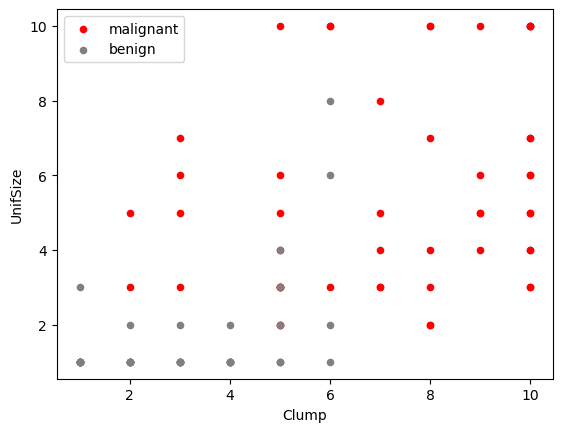

In [10]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Grey', label='benign', ax=ax);
plt.show()

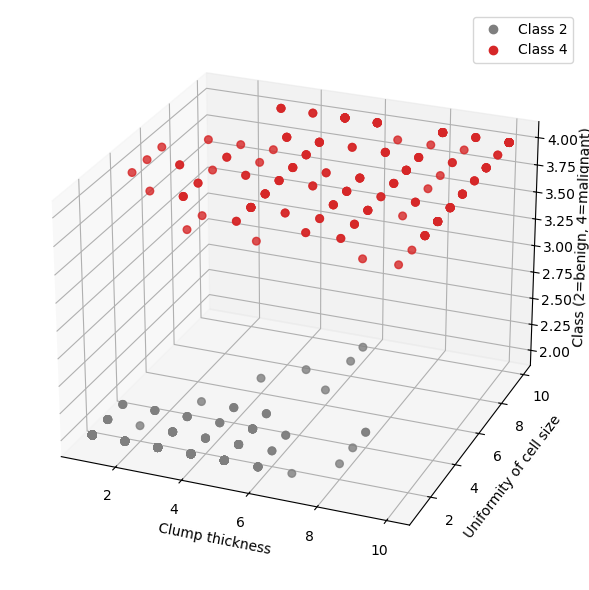

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Color map:
colors = {2: 'tab:gray', 4: 'tab:red'}
c = cell_df['Class'].map(colors)

# Points
sc = ax.scatter(
    cell_df['Clump'],
    cell_df['UnifSize'],
    cell_df['Class'],
    c=c,
    s=30,
    alpha=0.8
)

# Axis Names and Title
ax.set_xlabel('Clump thickness')
ax.set_ylabel('Uniformity of cell size')
ax.set_zlabel('Class (2=benign, 4=malignant)', labelpad=2)
#ax.set_title('3-D scatter: Clump vs UnifSize vs Class')

# Legend
handles = [plt.Line2D([], [], marker='o', ls='', color=colors[k], label=f'Class {k}') for k in colors]
ax.legend(handles=handles)

# Angle of View
ax.view_init(elev=25, azim=-68)

plt.tight_layout()
plt.show()

## Drug.csv

In [12]:
url = "https://raw.githubusercontent.com/vk4nubip/nubip-DS-ML/refs/heads/main/Data/Drug.csv"
drug_df = pd.read_csv(url)
drug_df.loc[(drug_df.Drug=="drugX") | (drug_df.Drug=='drugY')][19:50].head(10)

,Age,Sex,BP,Cholesterol,Na,K,Drug
25,28,F,HIGH,NORMAL,0.556833,0.029604,drugY
26,31,M,HIGH,HIGH,0.740936,0.024400,drugY
27,49,F,NORMAL,NORMAL,0.694689,0.074055,drugX
28,39,F,LOW,NORMAL,0.649096,0.028598,drugY
29,45,M,LOW,HIGH,0.753504,0.041976,drugY
30,18,F,NORMAL,NORMAL,0.553567,0.063265,drugX
32,49,M,LOW,NORMAL,0.625889,0.056828,drugX
33,65,F,HIGH,NORMAL,0.828898,0.026004,drugY
34,53,M,NORMAL,HIGH,0.644936,0.045632,drugX
35,46,M,NORMAL,NORMAL,0.526226,0.072234,drugX


**This dataset** is commonly known in tutorials (e.g., in sklearn or OpenML) and includes both categorical and numerical features.
* _Sex_: Categorical ('Male', 'Female')
* _BP_: Blood Pressure level. Categorical: one of 'HIGH', 'NORMAL', or 'LOW'
* _Cholesterol_: Cholesterol level. Categorical: one of 'NORMAL', 'HIGH'
* _Na_: Sodium level in the blood, mEq/L (milliequivalents per liter)
* _K_: Potassium level in the blood, mEq/L
* _Drug_: Multiclass Label ('DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY')

Commonly used ***objectives***:
* Classification tasks
* Feature encoding (e.g., One-Hot Encoding for categorical variables)
* Model explanation (e.g., showing importance of BP, K, etc., in drug prediction)

## TeleCust1000t.csv

In [13]:
url = "https://raw.githubusercontent.com/vk4nubip/nubip-DS-ML/refs/heads/main/Data/teleCust1000t.csv"
telco_df = pd.read_csv(url); telco_df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


Telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

**Dataset** has attributes, as follows:
* _region_: Geographic region 
* _tenure_: Number of months the customer has been with the company
* _age_: Age of the customer
* _marital_: Marital status (e.g., single, married)
* _address_: Number of years the customer has lived at the current address
* _income_: Estimated income
* _ed_: Education level 
* _employ_: Number of years of employment
* _retire_: Whether the customer is retired (0 = No, 1 = Yes)
* _gender_: (0 = Female, 1 = Male)
* _reside_: Number of people living in the household
* _custcat_: target variable — customer category (Basic Service, E-Service, Plus Service, Total Service)

# **Binary Classification**

## **Rice Type: kNN**

When training any machine learning model, it is important to split the data into training and test data. The training data is used to fit the model. The algorithm uses the training data to learn the relationship between the features and the target. It tries to find a pattern in the training data that can be used to make predictions on new, unseen data. The test data is used to evaluate the performance of the model. The model is tested on the test data by using it to make predictions and comparing these predictions to the actual target values. 

In [15]:
# Divide given columns into two types of variables dependent (target variable) and independent variables (feature variables).
# In other words, split dataset in features and target variable.
feature_cols = rice_df.columns.difference(['Class'])
X = rice_df[feature_cols] # Features
y = rice_df.Class         # Target variable

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

When training a kNN classifier, it's essential to normalize the features. This is because kNN measures the distance between points. The default is to use the Euclidean Distance, which is  the square root of the sum of the squared differences between two points. 

We should normalize the data after splitting it into training and test sets. This is to prevent ‘data leakage’ as the normalization would give the model additional information about the test set if we normalized all the data at once.

In [17]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Let's train the model. For this, we’ll use a fixed value of 3 for k, but we’ll need to optimize this later on. We first create an instance of the kNN model, then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [18]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We can make predictions on the test dataset, which we can use later to score the model.

In [19]:
y_pred = clf.predict(X_test)

The simplest way to evaluate this model is by using accuracy. We check the predictions against the actual values in the test set and count up how many the model got right.

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9852650098966351


Unfortunately, there is no magic way to find the best value for k. We have to loop through many different values, then use our best judgment.
In the below code, we select a range of values for k and create an empty list to store our results. We use cross-validation to find the accuracy scores, which means we don’t need to create a training and test split, but we do need to scale our data. We then loop over the values and add the scores to our list.
To implement cross-validation, we use scikit-learn’s cross_val_score. We pass an instance of the kNN model, along with our data and a number of splits to make. In the code below, we use five splits which means the model with split the data into five equal-sized groups and use 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which we average to find the best model.

In [21]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

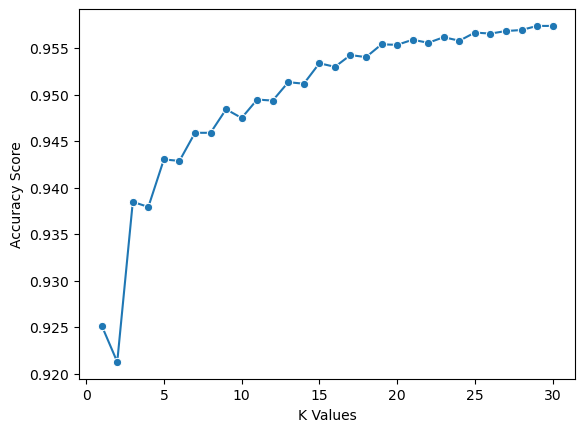

In [22]:
# We can plot the results with the following code

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [23]:
# We can now train our model using the best k value using the code below.
best_index = np.argmax(scores)
best_k = k_values[best_index]; print("Best k:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Best k: 29


KNeighborsClassifier(n_neighbors=29)

Then evaluate with accuracy, precision, and recall (note your results may differ due to randomization)

In [24]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')   
recall = recall_score(y_test, y_pred, average='binary')         

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.987684187376292
Precision: 0.9845605700712589
Recall: 0.9932108626198083


N.B. Please specify a valid **average** parameter (default = 'binary') for **multi-class classification**:
* ___micro___: Averages metrics globally across all classes (sums TP, FP, FN for all classes). It's suitable if all classes have equal importance.
* ___macro___: Averages metrics for each class separately, without taking into account their frequency (equal for all classes). Calculates the metric separately for each class, then takes the simple arithmetic mean. Gives equal weight to all classes, regardless of their size.
* ___weighted___: Averages metrics for each class, taking into account their weight (number of instances in the class). It calculates the metric separately for each class, and then takes the average weighted by the number of samples in each class. Recommended for unbalanced data.
* ___None___: Returns metrics for each class separately.

## **Cells: SVM**

In [25]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the BareNuc column includes some values that are not numerical. We can drop those rows

In [26]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [27]:
cell_df.drop('Class', axis=1).columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'],
      dtype='object')

In [28]:
# Divide given columns into two types of variables dependent (target variable) and independent variables (feature variables).
# In other words, split dataset in features and target variable.
feature_cols = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
X = cell_df[feature_cols] # Features
y = cell_df.Class         # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function)

In [29]:
# Create SVM classifer object
clf = svm.SVC(kernel='rbf')

# Train SVM Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9804878048780488


**Classification report**

In [30]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           2       1.00      0.97      0.98       133
           4       0.95      1.00      0.97        72

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



**Confusion Matrix**

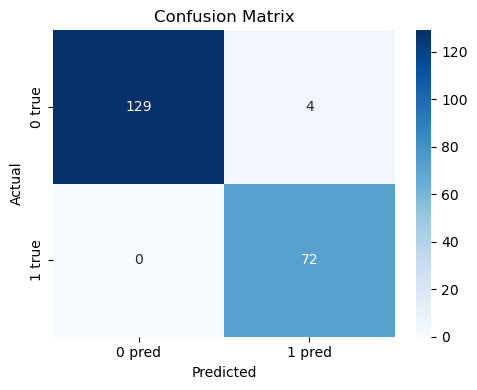

In [31]:
#### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [32]:
# You can also easily use the f1_score from sklearn library:
print( 
      metrics.f1_score(y_test, y_pred, average='weighted') 
)

# Let's try the jaccard index for accuracy:
print(
      metrics.jaccard_score(y_test, y_pred,pos_label=2)
)

0.9806025351361416
0.9699248120300752


## **Diabetes: Decision Tree**

In [33]:
# Divide given columns into two types of variables dependent (target variable) and independent variables (feature variables).
# In other words, split dataset in features and target variable.
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_df[feature_cols] # Features
y = diabetes_df.label         # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


**Feature Importances**

In [34]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))


Feature Importances:
glucose     0.562837
bmi         0.326594
age         0.110569
pregnant    0.000000
insulin     0.000000
bp          0.000000
pedigree    0.000000
dtype: float64


**Classification report**

In [35]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       146
         1.0       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



**Confusion Matrix**

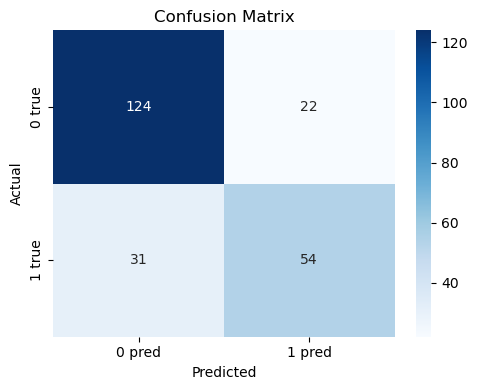

In [36]:
#### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## **Diabetes: Decision Tree**

In [37]:
# Divide given columns into two types of variables dependent (target variable) and independent variables (feature variables).
# In other words, split dataset in features and target variable.
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_df[feature_cols] # Features
y = diabetes_df.label         # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


**Feature Importances**

In [38]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))


Feature Importances:
glucose     0.562837
bmi         0.326594
age         0.110569
pregnant    0.000000
insulin     0.000000
bp          0.000000
pedigree    0.000000
dtype: float64


**Classification report**

In [39]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       146
         1.0       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



**Confusion Matrix**

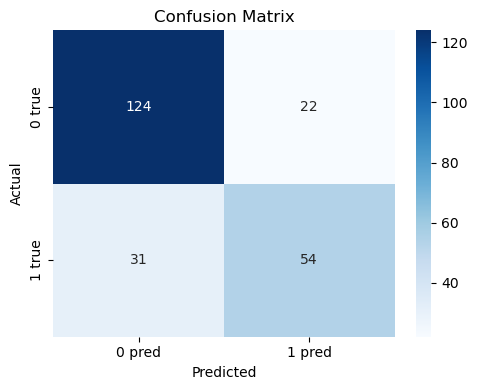

In [40]:
#### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

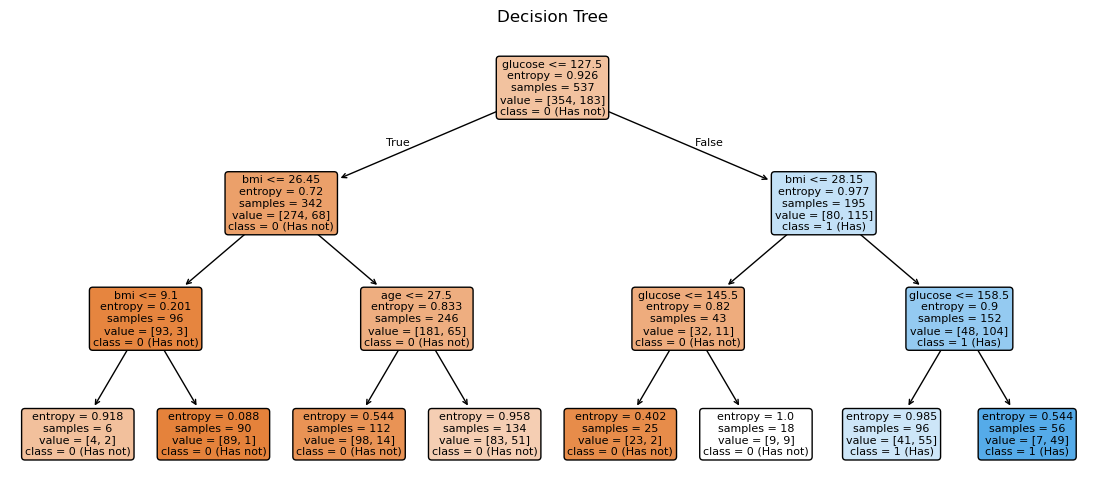

In [41]:
plt.figure(figsize=(14, 6))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=['0 (Has not)', '1 (Has)'],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

## Drugs: Binary Classification for X and Y

In [42]:
drug_df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [43]:
drug_df_s = drug_df.loc[(drug_df.Drug=="drugX") | (drug_df.Drug=='drugY')]

X = drug_df_s.drop(["Drug"], axis=1)  # Features  ("Na", "K", "BP")
y = drug_df_s.Drug                    # Target variable

## -----------
## Converting categorical variables like Sex and Cholesterol into numeric values, because most ML algorithms can't work directly with text labels.

# Define mappings for Sex
print(X.Sex.unique())
sex_mapping = {'M': 1, 'F': 0}
# Converting variable "Sex"
X['Sex'] = X['Sex'].map(sex_mapping)

# Converting "BP" that is the ordinal feature
print(X.BP.unique())
encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
X['BP'] = encoder.fit_transform(X[['BP']])

# Converting "Cholesterol" that is the ordinal feature
print(X.Cholesterol.unique())
encoder = OrdinalEncoder(categories=[['NORMAL', 'HIGH']])
X['Cholesterol'] = encoder.fit_transform(X[['Cholesterol']])

# Converting target "Drug" (y)
print(y.unique())
le = LabelEncoder()
y = le.fit_transform(y)   # drugX → 0, drugY → 1

## -----------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

['F' 'M']
['HIGH' 'NORMAL' 'LOW']
['HIGH' 'NORMAL']
['drugY' 'drugX']
Accuracy: 0.8181818181818182


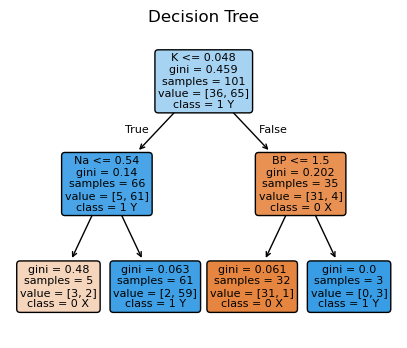

In [44]:
plt.figure(figsize=(5, 4))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=['0 X', '1 Y'],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

In [45]:
# Export to text
tree_rules = export_text(clf, feature_names=list(X.columns))  # list(X.columns) — назви ознак
print(tree_rules)

|--- K <= 0.05
|   |--- Na <= 0.54
|   |   |--- class: 0
|   |--- Na >  0.54
|   |   |--- class: 1
|--- K >  0.05
|   |--- BP <= 1.50
|   |   |--- class: 0
|   |--- BP >  1.50
|   |   |--- class: 1



## **Churn: Decision Tree**

In [46]:
#### Feature Selection
# Split dataset into dependent (target variable) and independent variables (feature variables)
feature_cols = ['CreditScore', 'Geography', 'Gender', 'Age','Tenure','Balance','NumOfProds', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = churn_df[feature_cols]  # Features
y = churn_df.Exited         # Target variable
display(churn_df.head(3))

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


**One-Hot Encoding**

In [47]:
#### One-Hot Encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist() # Create a one-hot encoder object
encoder = OneHotEncoder(sparse_output=False) # Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(X[categorical_columns]) # Create a DataFrame with the one-hot encoded columns

# We use get_feature_names_out() to get the column names for the encoded data
one_hot_churn_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)) # Concatenate the one-hot encoded dataframe with the original dataframe

churn_df_encoded = pd.concat([X, one_hot_churn_df], axis=1)
churn_df_encoded.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0


In [48]:
# Drop the original categorical columns
X_encoded_churn = churn_df_encoded.drop(categorical_columns, axis=1)

#### Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_churn, y, test_size=0.4, random_state=1234) # 60% train and 40% test

#### Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating the Model
# Model Accuracy, how often is the classifier correct?
print('Train and test size:', y_train.shape[0], ' and ',  y_test.shape[0])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Train and test size: 6000  and  4000
Accuracy: 0.847
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      3185
           1       0.77      0.35      0.48       815

    accuracy                           0.85      4000
   macro avg       0.81      0.66      0.70      4000
weighted avg       0.84      0.85      0.82      4000



In [49]:
# Feature Importances
feature_importance = clf.feature_importances_
feature_names = X_encoded_churn.columns
feature_importances = pd.DataFrame({'feature':feature_names, 'importance':feature_importance})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

              feature  importance
1                 Age    0.476238
4          NumOfProds    0.329105
6      IsActiveMember    0.106799
3             Balance    0.040442
9   Geography_Germany    0.031486
7     EstimatedSalary    0.015931
0         CreditScore    0.000000
2              Tenure    0.000000
5           HasCrCard    0.000000
8    Geography_France    0.000000
10    Geography_Spain    0.000000
11      Gender_Female    0.000000
12        Gender_Male    0.000000


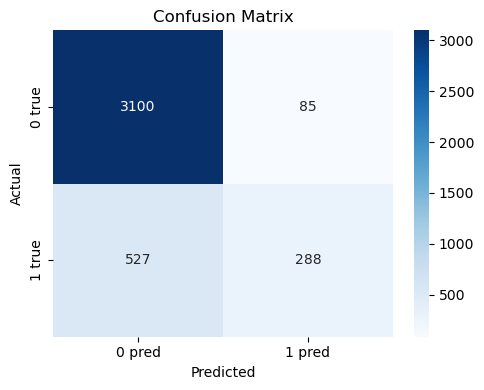

In [50]:
#### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

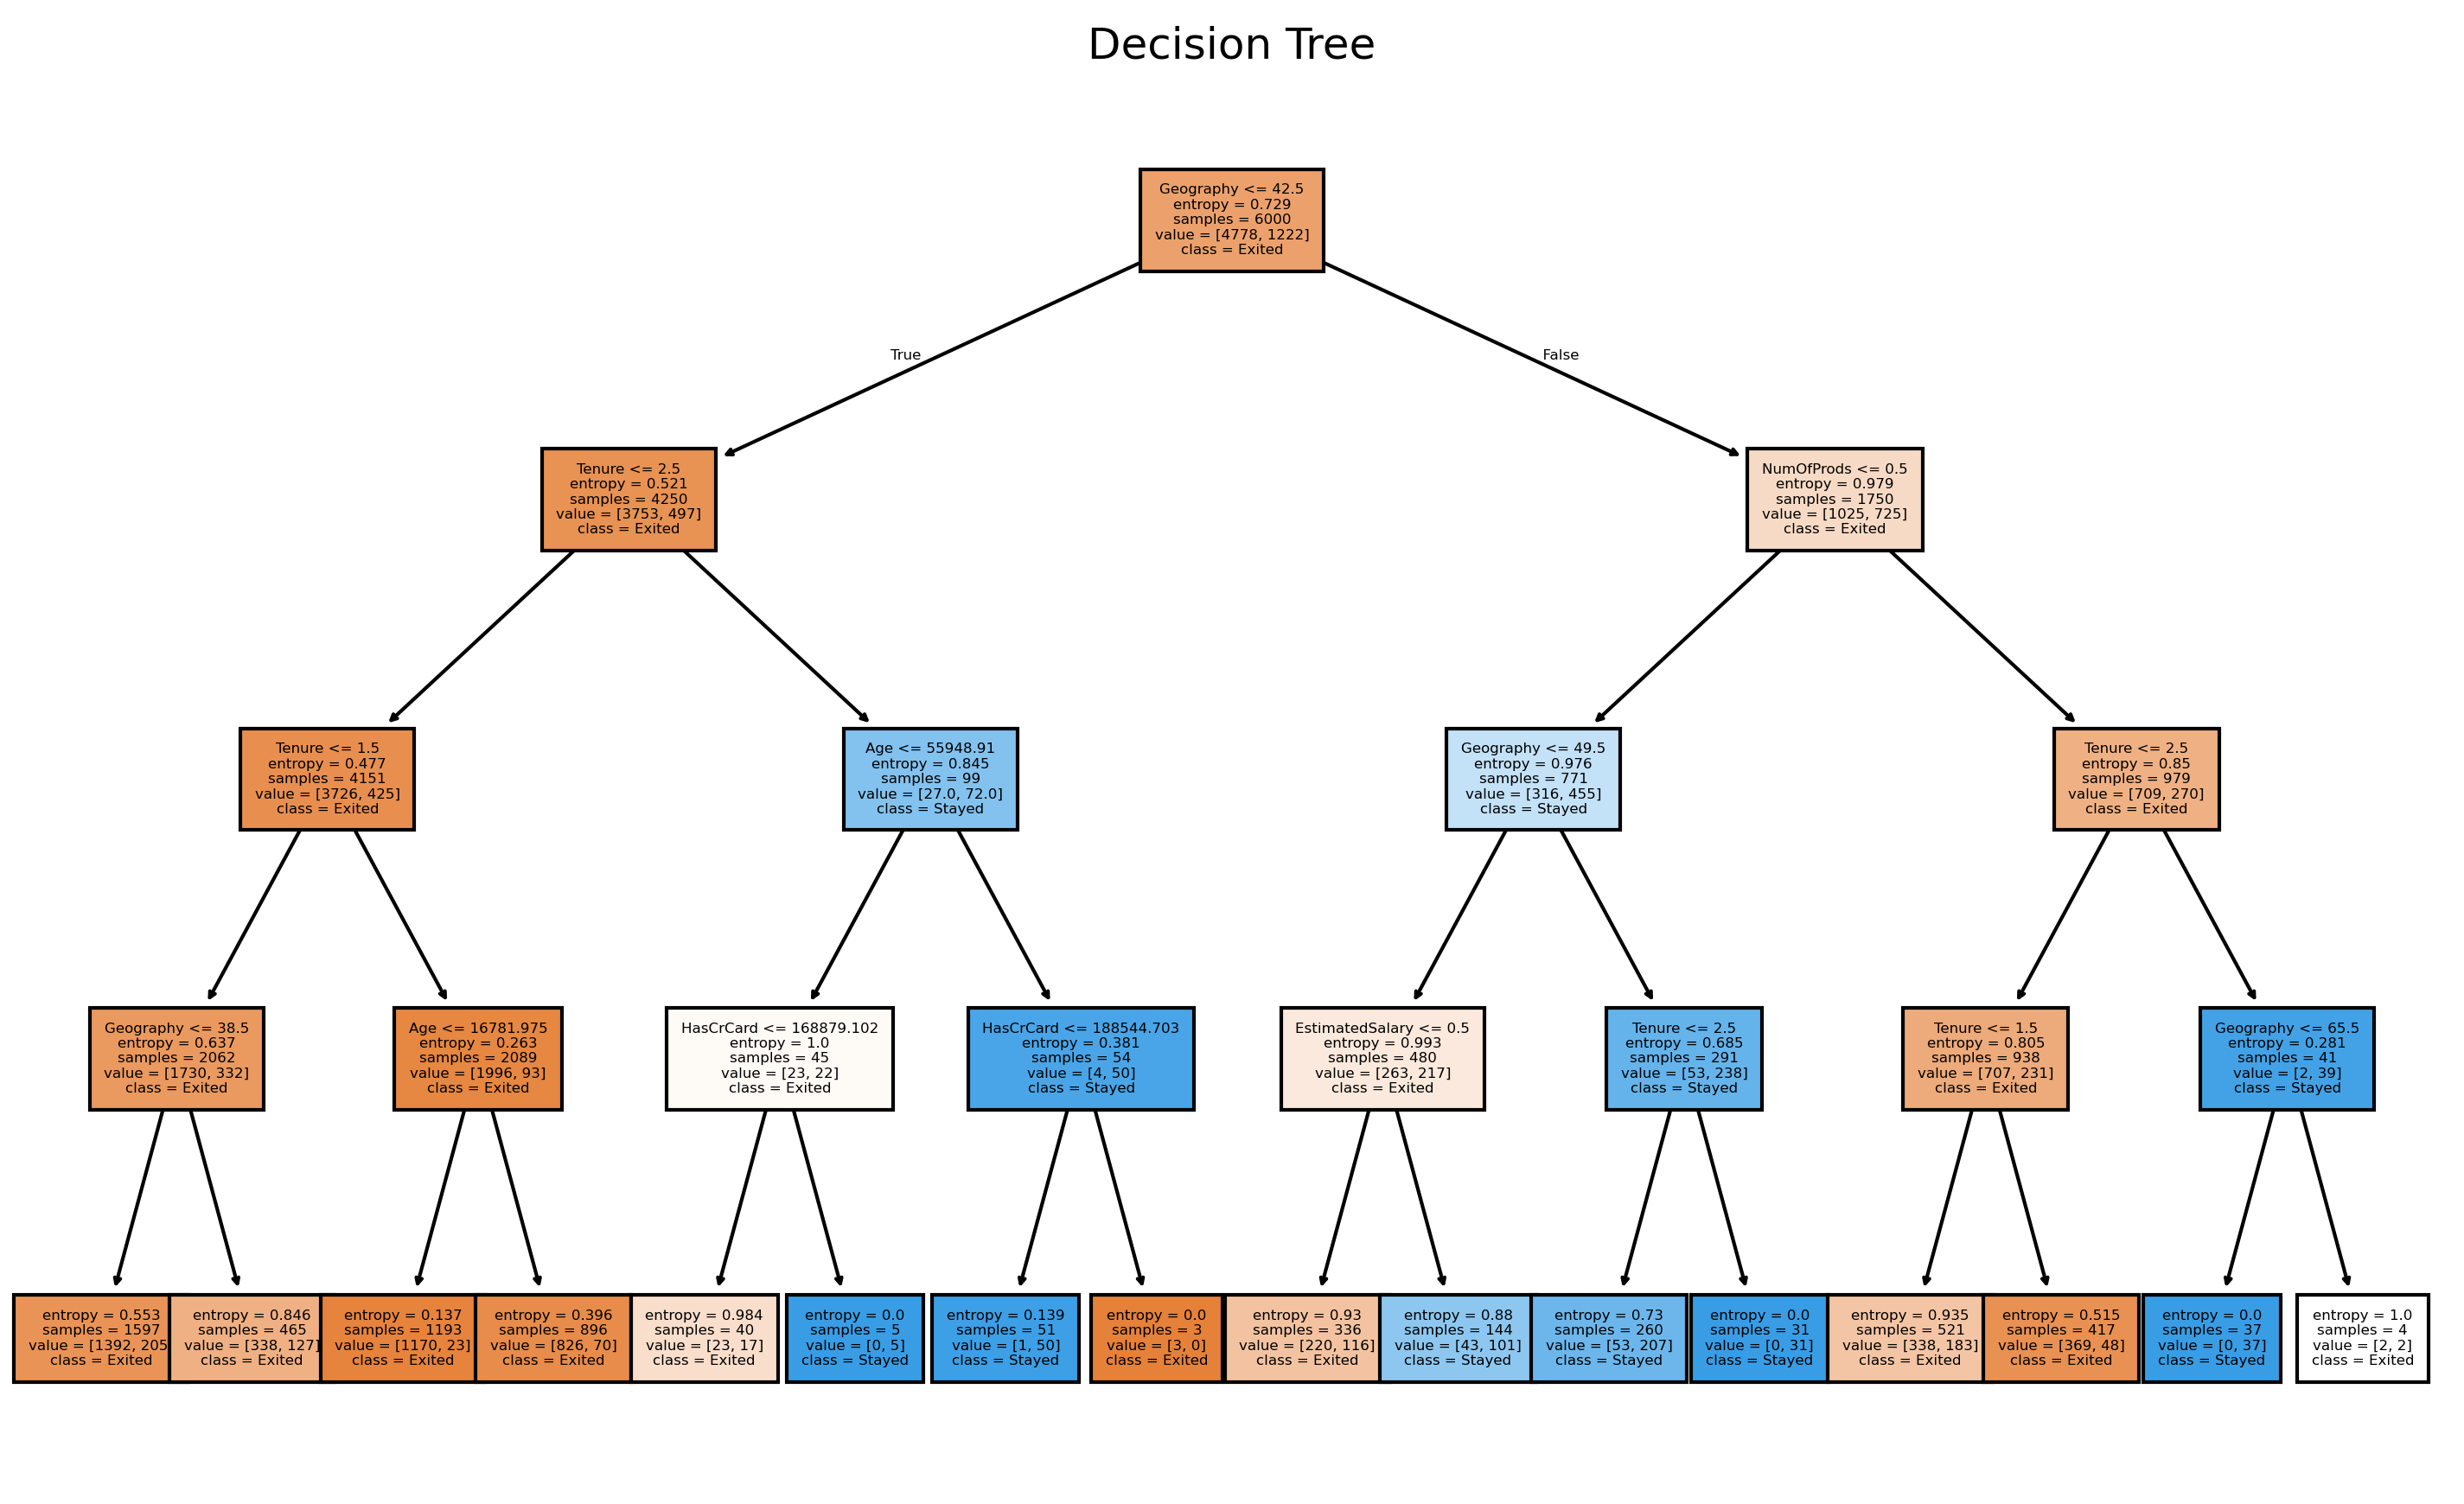

In [51]:
#### Plot Decision Tree
plt.figure(figsize=(12,7), dpi=300)
plot_tree(clf, feature_names=feature_cols, filled=True, class_names=["Exited", "Stayed"], fontsize=4)
plt.title("Decision Tree"); plt.show()

## **Churn: Random Forest**

**Random Forest Classifier**

In [52]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=30)
clf = clf.fit(X_train, y_train) # Predict the response for test dataset
y_pred = clf.predict(X_test)

In [53]:
print('Train and test size:', y_train.shape[0], ' and ',  y_test.shape[0])
print("Classification Report: \n", classification_report(y_test, y_pred))

Train and test size: 6000  and  4000
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      3185
           1       0.77      0.46      0.57       815

    accuracy                           0.86      4000
   macro avg       0.82      0.71      0.74      4000
weighted avg       0.85      0.86      0.85      4000



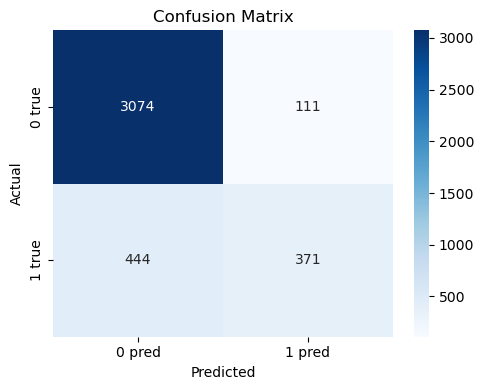

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [55]:
display(X_test.reset_index(drop=True)[3959:3964],
pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=['Predicted Exited']).tail(50)], axis = 1)[3959:3964])

,CreditScore,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3959,772,30,4,78653.05,1,1,0,1790.48,0.0,0.0,1.0,0.0,1.0
3960,628,50,4,122227.71,1,0,1,14217.77,0.0,1.0,0.0,0.0,1.0
3961,729,30,9,0.00,2,1,0,151869.35,1.0,0.0,0.0,0.0,1.0
3962,637,41,2,138014.40,2,1,0,140298.24,0.0,1.0,0.0,0.0,1.0
3963,540,35,7,128369.75,2,1,0,198256.15,0.0,1.0,0.0,1.0,0.0


,Exited,Predicted Exited
3959,0,0.0
3960,1,1.0
3961,0,0.0
3962,0,0.0
3963,0,0.0


# **Multi-Class Classification**

## **Beans: Random Forest**

In [56]:
y = bean_df.Class  # Target
X = bean_df.drop(y.name, axis=1)    # Features

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [58]:
clf = RandomForestClassifier(n_estimators=500, max_depth=30)
clf = clf.fit(X_train, y_train) # Predict the response for test dataset
y_pred = clf.predict(X_test)

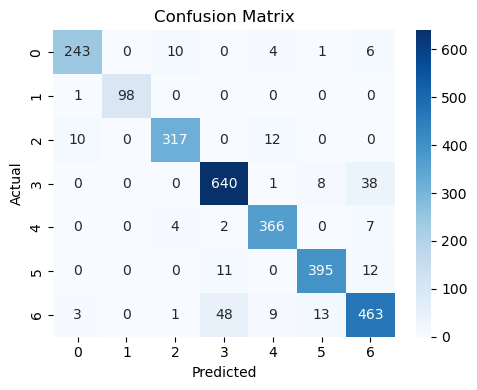

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [60]:
print("Unique classes seen by the model (textual, in order of their internal encoding):")
print(clf.classes_)
print('\n')

for i, class_name in enumerate(clf.classes_):
    print(f"{i}: {class_name}")

Unique classes seen by the model (textual, in order of their internal encoding):
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


0: BARBUNYA
1: BOMBAY
2: CALI
3: DERMASON
4: HOROZ
5: SEKER
6: SIRA


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       264
      BOMBAY       1.00      0.99      0.99        99
        CALI       0.95      0.94      0.94       339
    DERMASON       0.91      0.93      0.92       687
       HOROZ       0.93      0.97      0.95       379
       SEKER       0.95      0.94      0.95       418
        SIRA       0.88      0.86      0.87       537

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [62]:
pd.concat([y_test.reset_index(drop=True).head(3), pd.DataFrame(y_pred, columns=['Pred']).head(3)], axis = 1)

,Class,Pred
0,SEKER,SEKER
1,SIRA,SEKER
2,BOMBAY,BOMBAY


In [63]:
test_row = 1

if len(X_test) > 0:
    sample_prediction_proba = clf.predict_proba(X_test.iloc[[ test_row ]])[0]
    print(f"\nProbabilities for {test_row} test sample ({y_test.iloc[ test_row ]}):")
    for i, class_name in enumerate(clf.classes_):
        print(f"  Class '{class_name}' (index {i}): {sample_prediction_proba[i]:.4f}")

    sample_prediction = clf.predict(X_test.iloc[[ test_row ]])[0]
    print(f"Predicted class: {sample_prediction}")


Probabilities for 1 test sample (SIRA):
  Class 'BARBUNYA' (index 0): 0.0000
  Class 'BOMBAY' (index 1): 0.0000
  Class 'CALI' (index 2): 0.0000
  Class 'DERMASON' (index 3): 0.1220
  Class 'HOROZ' (index 4): 0.0000
  Class 'SEKER' (index 5): 0.6660
  Class 'SIRA' (index 6): 0.2120
Predicted class: SEKER


# **Multiple Classifier Pipeline**

## **Churn: Preparing Data**

In [64]:
display( churn_df.head(3) )
X = churn_df.drop(['Exited', 'CustomerId', 'Surname'] , axis = 1)  # Features
y = churn_df.Exited                    # Target variable

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [65]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)
print('Train and test size:', y_train.shape[0], ' and ',  y_test.shape[0])

Train and test size: 6000  and  4000


## **Preprocessor**

In [66]:
# Select categorical variables for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# Select numeric valiables for scaling (standartization or normalization)
numerical_features = X.select_dtypes(include=['float']).columns.tolist()
# Select integer valiables
integer_features = X.select_dtypes(include=['int']).columns.tolist()

In [67]:
# Select standartization or normalization
scale_type   = "minmax"         # "standard" or "minmax"

if scale_type == "standard":
    scaler = StandardScaler()
else:
    scaler = MinMaxScaler()

# Apply ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
        transformers=[
             # One-Hot Encoding categorical variables
             ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features),
             ('num', scaler, numerical_features),   # Scaling numerical variables
             ('int_pass', 'passthrough', integer_features)   # Add integers WITHOUT scaling
        ],
        remainder='drop'          ## Ignore other columns
)

## **Classifiers**

In [68]:
# Determine classifires
classifiers = {
    ## Logistic Regression
    'LR': LogisticRegression(
                          max_iter = 1000
                        , solver = 'liblinear'        # 'liblinear'  /  'lbfgs'
                        , class_weight='balanced'     # 'balanced'  /  None
                        , random_state=1234
                        , n_jobs=2
                        , C = np.float64(0.1)
        ),
    # Support Vector Machine
    'SVM': SVC(
                          kernel='linear'  # 'linear' 'rbf'
                        , probability=False
        ),
    ## Gradient Boosting Machine
    'GBM': GradientBoostingClassifier(
                          n_estimators = 600
                        , learning_rate = 0.04
                        , max_depth = 32
                        , min_samples_split = 4
                        , min_samples_leaf = 8
                        , max_features = 'sqrt'
                        , random_state=1234
        ),
    ## Light Gradient Boosting Machine
    'LGB': LGBMClassifier(
                          boosting_type='dart'
                        , num_leaves=63
                        , max_depth=6
                        , learning_rate=0.1
                        , n_estimators=201
                        , class_weight={0: 1, 1: 3.93}
                        , min_child_samples=20
                        , colsample_bytree=0.6
                        , reg_alpha=1.0
                        , reg_lambda=1.0
                        , max_features = 'sqrt'
                        , n_jobs=-1
                        , importance_type='gain'
                        , verbose=-1  # -1 turns off warnings, 0 shows errors, 1 show more information
        ),
    ## Random Forest
    'RF': RandomForestClassifier(
                          criterion = "gini"  # "entropy"  "gini"
                        , n_estimators = 1000
                        , max_depth = 30
                        , class_weight = "balanced"     # "balanced"  /  None
                        , min_samples_split = 47
                        , min_samples_leaf = 7
                        , max_features = 'sqrt'       # “sqrt”  /  “log2”  /  None
                        , bootstrap = True
                        , random_state=1234
                        , n_jobs=-1
        )
}

In [69]:
# Creating pipelines for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

## **Training and Results**

In [70]:
# ~~~ is OUTSIDE the scope of the main manual ~~~~~
# Прапорець, щоб переконатися, що ми показуємо X_train лише один раз
is_x_train_displayed = False
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


--- Перші 3 рядки X_train ПІСЛЯ трансформації ---


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Male,num__Balance,num__EstimatedSalary,int_pass__CreditScore,int_pass__Age,int_pass__Tenure,int_pass__NumOfProds,int_pass__HasCrCard,int_pass__IsActiveMember
0,1.0,0.0,1.0,0.609492,0.139029,646.0,50.0,6.0,2.0,1.0,1.0
1,0.0,0.0,0.0,0.000000,0.853131,535.0,45.0,2.0,2.0,0.0,1.0
2,0.0,0.0,0.0,0.000000,0.634986,641.0,40.0,7.0,1.0,1.0,0.0


----------------------------------------

LR Accuracy: 0.7170
ROC-AUC  : 0.7004
              precision    recall  f1-score   support

           0     0.8968    0.7284    0.8039      3185
           1     0.3878    0.6724    0.4919       815

    accuracy                         0.7170      4000
   macro avg     0.6423    0.7004    0.6479      4000
weighted avg     0.7931    0.7170    0.7403      4000



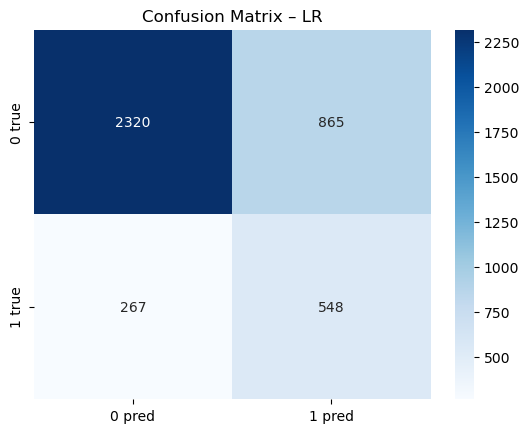

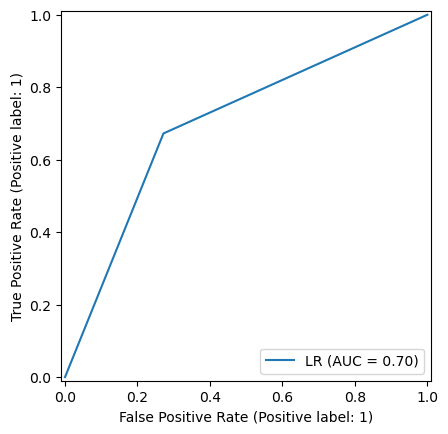

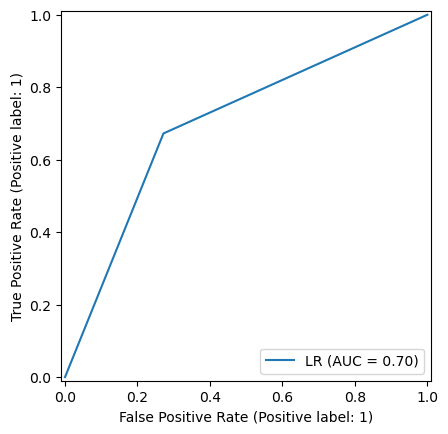

SVM Accuracy: 0.8143
ROC-AUC  : 0.5939
              precision    recall  f1-score   support

           0     0.8291    0.9658    0.8922      3185
           1     0.6241    0.2221    0.3276       815

    accuracy                         0.8143      4000
   macro avg     0.7266    0.5939    0.6099      4000
weighted avg     0.7873    0.8143    0.7772      4000



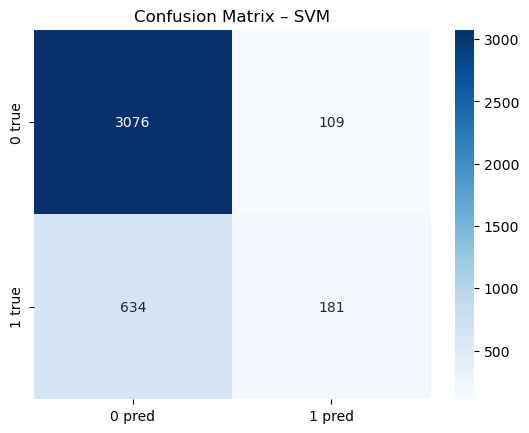

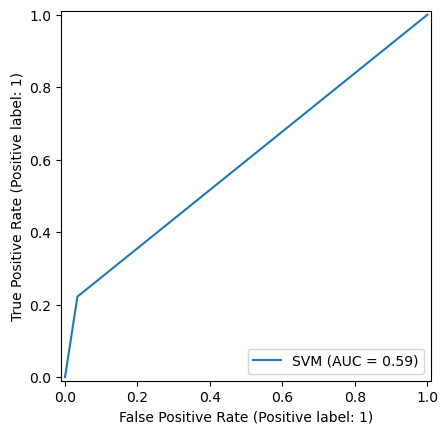

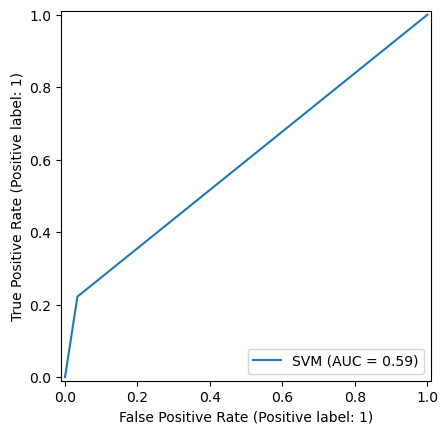

GBM Accuracy: 0.8548
ROC-AUC  : 0.7093
              precision    recall  f1-score   support

           0     0.8744    0.9548    0.9128      3185
           1     0.7241    0.4638    0.5654       815

    accuracy                         0.8548      4000
   macro avg     0.7992    0.7093    0.7391      4000
weighted avg     0.8437    0.8548    0.8420      4000



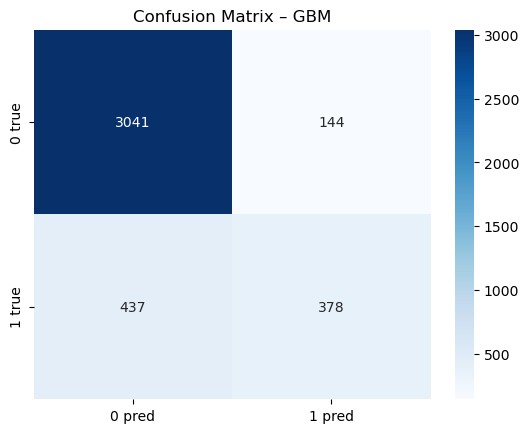

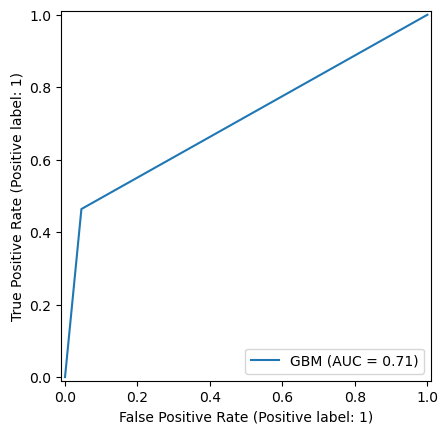

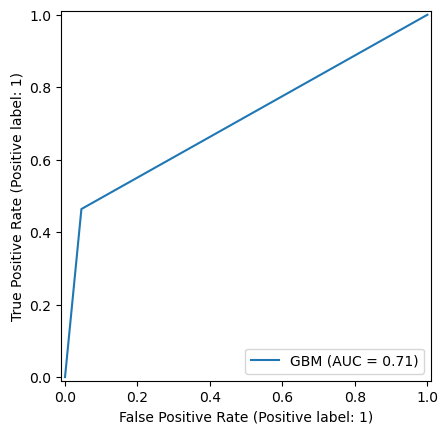

LGB Accuracy: 0.8205
ROC-AUC  : 0.7750
              precision    recall  f1-score   support

           0     0.9169    0.8518    0.8831      3185
           1     0.5466    0.6982    0.6131       815

    accuracy                         0.8205      4000
   macro avg     0.7317    0.7750    0.7481      4000
weighted avg     0.8414    0.8205    0.8281      4000



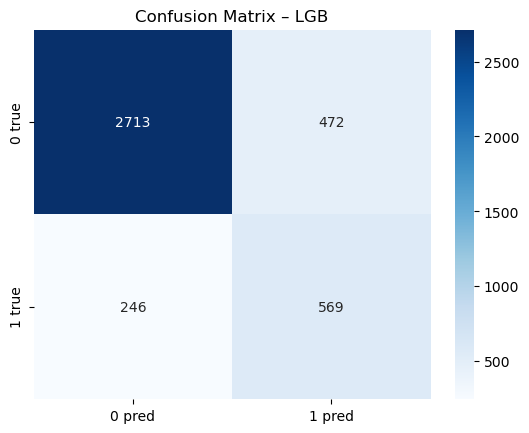

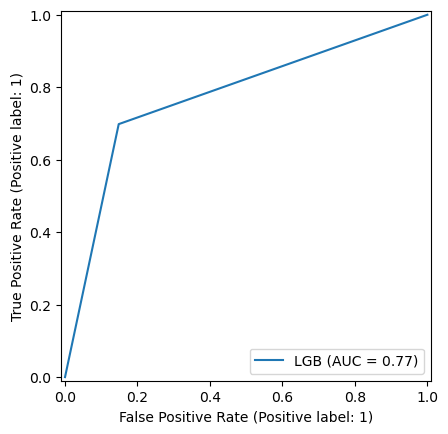

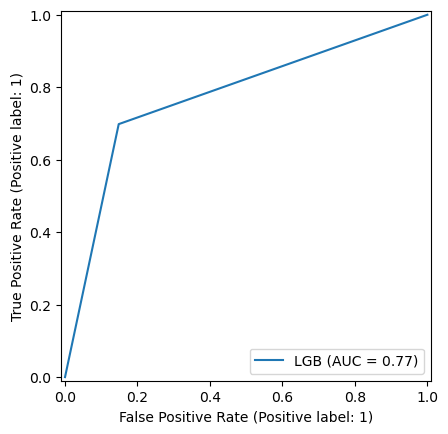

RF Accuracy: 0.8223
ROC-AUC  : 0.7715
              precision    recall  f1-score   support

           0     0.9143    0.8571    0.8848      3185
           1     0.5513    0.6859    0.6113       815

    accuracy                         0.8223      4000
   macro avg     0.7328    0.7715    0.7480      4000
weighted avg     0.8403    0.8223    0.8291      4000



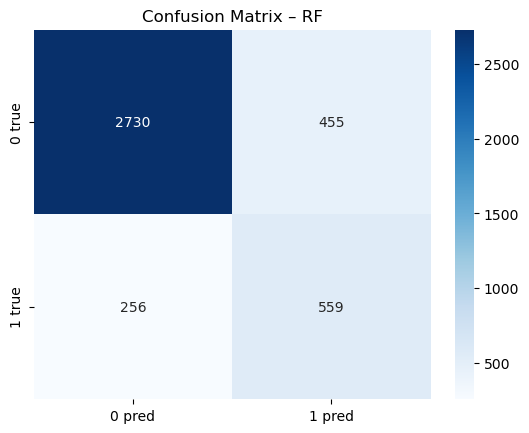

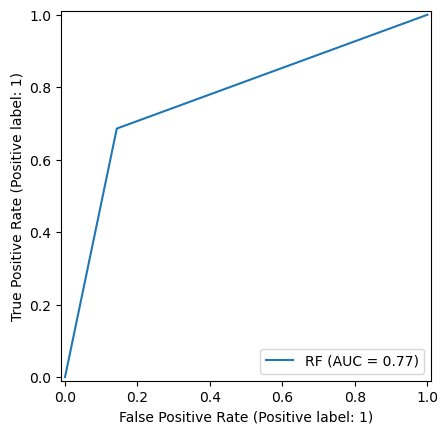

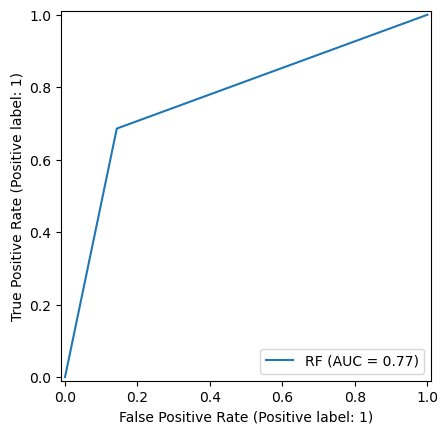

In [71]:
for name, pipe in pipelines.items():
    # Training the models
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    acc     = accuracy_score(y_test, y_pred)
    roc     = roc_auc_score(y_test, y_pred)

    # ~~~ is OUTSIDE the scope of the main manual ~~~~~~~~~
    #  --- БЛОК ВІДОБРАЖЕННЯ X_train (після трансформації) ---
    if not is_x_train_displayed:
        print("\n--- Перші 3 рядки X_train ПІСЛЯ трансформації ---")
        # 1. Отримати навчений препроцесор з пайплайну
        fitted_preprocessor = pipe.named_steps['preprocessor']
        # 2. Трансформувати X_train
        X_train_transformed = fitted_preprocessor.transform(X_train)
        # 3. Отримати нові назви колонок (важливо після OneHotEncoder)
        # get_feature_names_out() дає назви колонок після трансформації
        feature_names = fitted_preprocessor.get_feature_names_out()
        # 4. Конвертувати результат (який є NumPy array) назад у Pandas DataFrame для зручного перегляду
        X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
        # 5. Показати перші 3 рядки
        display(X_train_transformed_df.head(3))
        print("-" * 40 + "\n")
        # Встановити прапорець, щоб не показувати це знову в наступній ітерації
        is_x_train_displayed = True
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    # Metrics
    print(f'{name} Accuracy: {pipe.score(X_test, y_test):.4f}')
    print("ROC-AUC  :", f"{roc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confustion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0 pred','1 pred'],
                yticklabels=['0 true','1 true'])
    plt.title(f'Confusion Matrix – {name}')
    plt.show()

    # ROC curve
    RocCurveDisplay.from_predictions(y_test, y_pred,
                                     name=name,
                                     pos_label=1).plot()
    plt.show()

## **Ensembles**

### **Voting Classifier**

In [72]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', pipelines['LR']),
        ('svc', pipelines['SVM']),
        ('gbc', pipelines['GBM']),
        ('rf', pipelines['RF']),
        ('lgb', pipelines['LGB']),
    ],
    voting='hard'  # 'hard' or 'soft' to use probabilities
)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



VotingClassifier Accuracy: 0.8440
              precision    recall  f1-score   support

           0     0.9066    0.8964    0.9015      3185
           1     0.6122    0.6393    0.6255       815

    accuracy                         0.8440      4000
   macro avg     0.7594    0.7678    0.7635      4000
weighted avg     0.8466    0.8440    0.8452      4000



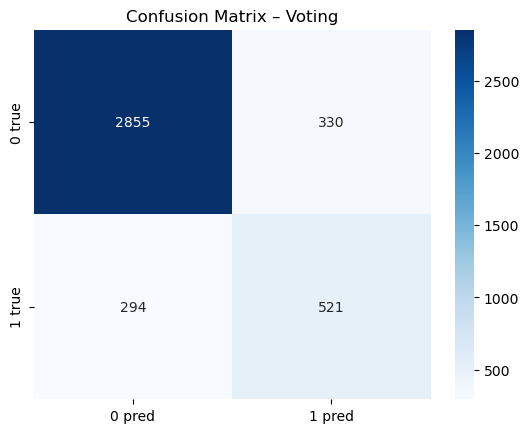

In [73]:
# Training Voting Classifier
voting_clf.fit(X_train, y_train)
# Predicting
y_pred = voting_clf.predict(X_test)

voting_score = accuracy_score(y_test, y_pred)
print(f'\nVotingClassifier Accuracy: {voting_score:.4f}')
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred','1 pred'],
            yticklabels=['0 true','1 true'])
plt.title(f'Confusion Matrix – Voting')
plt.show()

### **Stacking Classifier**

In [74]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', pipelines['LR'].named_steps['classifier']),
        ('svc', pipelines['SVM'].named_steps['classifier']),
        ('gbc', pipelines['GBM'].named_steps['classifier']),
        ('rf', pipelines['RF'].named_steps['classifier']),
        ('lgb', pipelines['LGB'].named_steps['classifier'])
    ],
    final_estimator=pipelines['RF'].named_steps['classifier'],
    cv=5
)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

StackingClassifier Accuracy: 0.8123
              precision    recall  f1-score   support

           0     0.9100    0.8480    0.8779      3185
           1     0.5310    0.6724    0.5934       815

    accuracy                         0.8123      4000
   macro avg     0.7205    0.7602    0.7357      4000
weighted avg     0.8328    0.8123    0.8200      4000



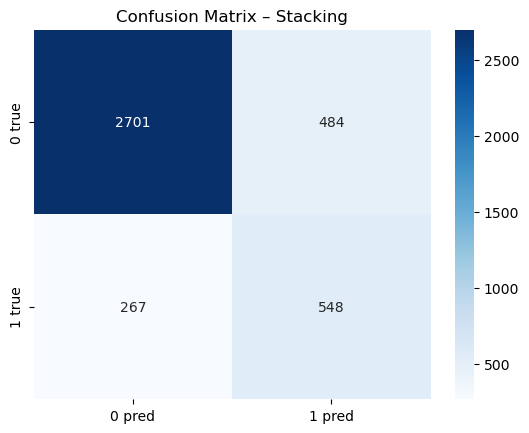

In [75]:
# Create Pipeline for Stacking
stacking_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

# Training Stacking Model
stacking_pipe.fit(X_train, y_train)

# Predicting
y_pred = stacking_pipe.predict(X_test)

# Metrics
stacking_score = accuracy_score(y_test, y_pred)
print(f'StackingClassifier Accuracy: {stacking_score:.4f}')

print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred','1 pred'],
            yticklabels=['0 true','1 true'])
plt.title(f'Confusion Matrix – Stacking')
plt.show()